# Pérdida de Entropía Cruzada Categórica

In [1]:
import math
# Un ejemplo de salida de la capa de salida de la red neuronal
softmax_output = [0.7, 0.1, 0.2]
# Etiqueta real (verdadero valor)
target_output = [1, 0, 0]
loss = -(math.log(softmax_output[0])*target_output[0] +
 math.log(softmax_output[1])*target_output[1] +
 math.log(softmax_output[2])*target_output[2])
print(loss)

0.35667494393873245


In [2]:
loss = -math.log(softmax_output[0])

In [3]:
import math
print(math.log(1.))
print(math.log(0.95))
print(math.log(0.9))
print(math.log(0.8))
print('...')
print(math.log(0.2))
print(math.log(0.1))
print(math.log(0.05))
print(math.log(0.01))

0.0
-0.05129329438755058
-0.10536051565782628
-0.2231435513142097
...
-1.6094379124341003
-2.3025850929940455
-2.995732273553991
-4.605170185988091


In [4]:
import numpy as np
b = 5.2
print(np.log(b))

1.6486586255873816


In [5]:
import math
print(math.e ** 1.6486586255873816)

5.199999999999999


In [6]:
# Probabilidades para 3 muestras
softmax_outputs = np.array([[0.7, 0.1, 0.2],
 [0.1, 0.5, 0.4],
 [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1] # perro, gato, gato
for targ_idx, distribution in zip(class_targets, softmax_outputs):
    print(distribution[targ_idx])

0.7
0.5
0.9


In [7]:
print(softmax_outputs[
 range(len(softmax_outputs)), class_targets
])

[0.7 0.5 0.9]


# Aplicando el logaritmo negativo

In [8]:
print(-np.log(softmax_outputs[
 range(len(softmax_outputs)), class_targets
]))

[0.35667494 0.69314718 0.10536052]


In [9]:
neg_log = -np.log(softmax_outputs[
 range(len(softmax_outputs)), class_targets
 ])
average_loss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


In [10]:
import numpy as np

# Salidas de softmax
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                             [0.1, 0.5, 0.4],
                             [0.02, 0.9, 0.08]])

# Clases objetivo
class_targets = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 1, 0]])

# Probabilidades solo para los valores objetivo si son etiquetas categóricas
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
        range(len(softmax_outputs)),
        class_targets
    ]
# Valores de máscara: solo para etiquetas codificadas como one-hot
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        softmax_outputs * class_targets,
        axis=1
    )

# Pérdidas
neg_log = -np.log(correct_confidences)
average_loss = np.mean(neg_log)

print("Pérdida promedio:", average_loss)

Pérdida promedio: 0.38506088005216804


In [11]:
import numpy as np
print(-np.log(0)) 

inf


/tmp/ipykernel_202/764338978.py:2: RuntimeWarning: divide by zero encountered in log
  print(-np.log(0))


In [12]:
print(np.e**(-np.inf))

0.0


In [13]:
import numpy as np
print(np.mean([1, 2, 3, -np.log(0)]))

inf


/tmp/ipykernel_202/3904064069.py:2: RuntimeWarning: divide by zero encountered in log
  print(np.mean([1, 2, 3, -np.log(0)]))


In [14]:
print(-np.log(1e-7))

16.11809565095832


In [15]:
print(-np.log(1+1e-7))

-9.999999505838704e-08


In [16]:
print(-np.log(1-1e-7))

1.0000000494736474e-07


# Clase Pérdida de Entropía Cruzada Categórica

In [17]:
class Loss:
    # Calcula las pérdidas de datos y regularización
    # dadas la salida del modelo y los valores reales
    def calculate(self, output, y):
        # Calcular las pérdidas de las muestras
        sample_losses = self.forward(output, y)
        # Calcular la pérdida media
        data_loss = np.mean(sample_losses)
        # Retorna la pérdida
        return data_loss
    
    # Método que debe ser implementado en subclases
    def forward(self, output, y):
        raise NotImplementedError("El método 'forward' debe ser implementado en subclases.")

In [18]:
# Pérdida de entropía cruzada
class Loss_CategoricalCrossentropy(Loss):
    # Paso hacia adelante
    def forward(self, y_pred, y_true):
        # Número de muestras en un lote
        samples = len(y_pred)

        # Recortar datos para prevenir la división por 0
        # Recortar ambos lados para no arrastrar la media hacia ningún valor
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilidades para valores objetivo, solo si son etiquetas categóricas
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Valores de máscara - solo para etiquetas codificadas en one-hot 
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Pérdidas
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [19]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


# Combinando todo lo que hemos visto hasta este punto

In [20]:
!pip install nnfs

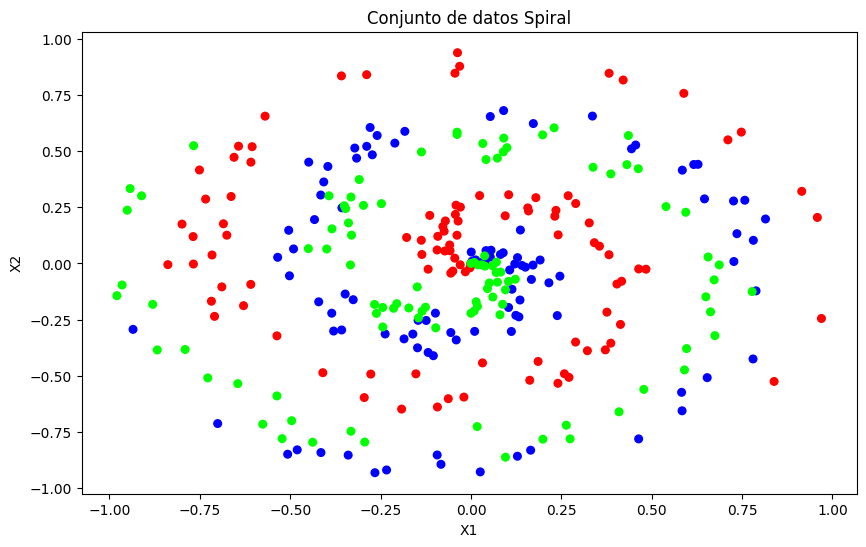

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss: 1.0986104


In [21]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()

# Crear conjunto de datos
X, y = spiral_data(samples=100, classes=3)

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', s=30)  # c para colores según las clases
plt.title('Conjunto de datos Spiral')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Capa densa
class Layer_Dense:
    # Inicialización de la capa
    def __init__(self, n_inputs, n_neurons):
        # Inicializar pesos y sesgos
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Paso hacia adelante
    def forward(self, inputs):
        # Calcular valores de salida a partir de entradas, pesos y sesgos
        self.output = np.dot(inputs, self.weights) + self.biases

# Activación ReLU
class Activation_ReLU:
    # Paso hacia adelante
    def forward(self, inputs):
        # Calcular valores de salida a partir de las entradas
        self.output = np.maximum(0, inputs)

# Activación Softmax
class Activation_Softmax:
    # Paso hacia adelante
    def forward(self, inputs):
        # Obtener probabilidades no normalizadas
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalizarlas para cada muestra
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

# Clase de pérdida común
class Loss:
    # Calcula las pérdidas de datos y de regularización
    # dadas la salida del modelo y los valores de verdad básica
    def calculate(self, output, y):
        # Calcular pérdidas por muestra
        sample_losses = self.forward(output, y)
        # Calcular pérdida media
        data_loss = np.mean(sample_losses)
        # Retornar pérdida
        return data_loss

# Pérdida de entropía cruzada
class Loss_CategoricalCrossentropy(Loss):
    # Paso hacia adelante
    def forward(self, y_pred, y_true):
        # Número de muestras en un lote
        samples = len(y_pred)
        # Recortar datos para prevenir la división por 0
        # Recortar ambos lados para no arrastrar la media hacia ningún valor
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilidades para valores objetivo - solo si son etiquetas categóricas
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Valores de máscara - solo para etiquetas codificadas en one-hot
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        # Pérdidas
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

# Crear una capa densa con 2 características de entrada y 3 valores de salida
dense1 = Layer_Dense(2, 3)

# Crear activación ReLU (para ser utilizada con la capa densa):
activation1 = Activation_ReLU()

# Crear una segunda capa densa con 3 características de entrada
# (ya que tomamos la salida de la capa anterior) y 3 valores de salida
dense2 = Layer_Dense(3, 3)

# Crear activación Softmax (para ser utilizada con la capa densa):
activation2 = Activation_Softmax()

# Crear función de pérdida
loss_function = Loss_CategoricalCrossentropy()

# Realizar una pasada hacia adelante de nuestros datos de entrenamiento a través de la capa densa
dense1.forward(X)

# Realizar una pasada hacia adelante a través de la función de activación;
# toma la salida de la primera capa densa aquí
activation1.forward(dense1.output)

# Realizar una pasada hacia adelante a través de la segunda capa densa;
# toma las salidas de la función de activación de la primera capa como entradas
dense2.forward(activation1.output)

# Realizar una pasada hacia adelante a través de la función de activación;
# toma la salida de la segunda capa densa aquí
activation2.forward(dense2.output)

# Veamos la salida de las primeras muestras:
print(activation2.output[:5])

# Realizar una pasada hacia adelante a través de la función de pérdida;
# toma la salida de la segunda capa densa aquí y devuelve la pérdida
loss = loss_function.calculate(activation2.output, y)

# Imprimir el valor de la pérdida
print('loss:', loss)

In [22]:
import numpy as np
# Probabilidades de 3 muestras
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])
# Etiquetas objetivo (verdaderas) para 3 muestras
class_targets = np.array([0, 1, 1])
# Calcular los valores a lo largo del segundo eje (eje de índice 1)
predictions = np.argmax(softmax_outputs, axis=1)
# Si los objetivos están codificados en una sola categoría (one-hot), convertirl
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
# True se evalúa como 1; False como 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)

acc: 0.6666666666666666


In [23]:
# Calcular la precisión a partir de la salida de activation2 y los objetivos,
# calculando los valores a lo largo del primer eje.
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Imprimir la exactitud
print('acc:', accuracy)

acc: 0.34
